In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split

C:\Users\kikiy\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kikiy\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\kikiy\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df_reviews = pd.read_csv("datasets/amazon_fine_food_review.csv")
df_reviews.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
score = df_reviews["Score"]
summary = df_reviews["Summary"]
rvs = df_reviews["Text"]
print(rvs)

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object


##### Parsing data

In [49]:
#set up lists for refined data
useful_data = []
useful_score = []
useful_summary = []

review_length = 400     #set threshold for length of string to 500
for i,sentence in enumerate(rvs):
    if len(sentence) < review_length:
        useful_data.append(sentence)
        useful_score.append(score[i])
        useful_summary.append(summary[i])

print("Original data size was:{}".format(rvs.shape[0]))
print("Reduced data size is:{}".format(len(useful_data)))
print("Review size threshold is:{}".format(review_length))

Original data size was:568454
Reduced data size is:360149
Review size threshold is:400


###### Cleaning data

In [139]:
def clean_data(data):
    clean_data = []
    for i,sentence in enumerate(useful_data):
        sentence = re.sub('<br />','',sentence)      #replace the string with ''
        sentence = re.sub('</a>','',sentence)      
        sentence = re.sub(r'<a href\S+', '', sentence, flags=re.MULTILINE)
        sentence = re.sub('amazon.com','amazon',sentence)     
        clean_data.append(sentence)
    return clean_data
#removed hyperlinks,weird symbols and other irrelevant pieces of data.

In [140]:
cleaned_data = clean_data(useful_data)   # get the cleaned up data

In [143]:
train_data, test_data = train_test_split(cleaned_data,test_size=0.3) #split the cleaned data into train and test

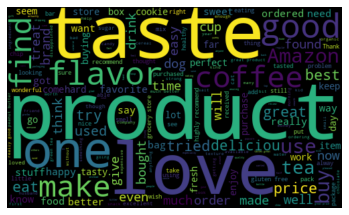

In [153]:
all_reviews = ''.join([sentence for sentence in cleaned_data])
word_cloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(all_reviews)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [142]:
#cleaning the data 
data_copy = useful_data.copy()
for i,sentence in enumerate(cleaned_data):
    dt = re.findall(r'"(.*?)"',sentence)        #find all related strings
#     dt = re.findall('amazon.com',sentence)        #find all related strings
    if len(dt)> 1:
#         print("ORIGINAL SENTENCE",dt,i)
        print(sentence)
        print()
        
#         print("CLEANED SENTENCE")
#         sentence = re.sub('<br />','',sentence)      #replace the string with ''
#         print(sentence)
#         print()
        
        
    if (i>500):
        break
print(cleaned_data[17])
print("done")

I paid $1.79 for a 2 ounce pkg of these at lunch today. I bought them because brown rice is a "good" carb.  As soon as I tasted one and it tasted like a corn chip I checked the ingredients.  The name is deceptive - these have "Masa corn flour" listed in the ingredients and it overwhelms the taste.  I won't buy these again - I can get Sunchips for less money and similar taste.

Unless you really really really like vinegar - AVOID! Those chips should have been called "Vinegar and Sea Salt" - not "Sea Salt and Vinegar".

These chips are tasty but not what I expected from a "low salt" item.  They seem as salty as any "regular" potato chip, and they also seem excessively greasy.  By comparison, Cape Cod Reduced Fat chips are less salty with at least as much potato flavor and far less greasy.

I was out to dinner with friends & family at "The Saloon" in "Rte 46 Entertainment Complex" in Sanford FL. Besides having an awesome staff (ask for Keith) and fabulous food (the escargot is a MUST) the

In [154]:
#cleaning the data 
data_copy = useful_data.copy()
# for i,sentence in enumerate(useful_data):
#     dt = re.findall('<*>',sentence)        #find all related strings
# #     dt = re.findall('amazon.com',sentence)        #find all related strings
#     if len(dt)> 1:
# #         print("ORIGINAL SENTENCE",dt,i)
#         print(i)
#         print(sentence)
#         print()
        
# #         print("CLEANED SENTENCE")
# #         sentence = re.sub('<br />','',sentence)      #replace the string with ''
# #         cd.append(clean_dt)
# #         print()
        
        
#     if (i>7000):
#         break
print("done")

done
